# Задача

Основные задачи для данного решения
1. Проанализировать данные о доходности каждого рейса и затратах на них, используя основные и  дополнительные данные;
2. Указать номера рейсов, которые предлагается убрать. 
3. Указать предполагаемую прибыльность этих рейсов и среднюю прибыльность всех рейсов.
4. Опишите, как вы проводили аналитику, какие данные были использованы для оценки доходности рейса и расходов на них.

### 1.Библиотеки

Загрузим необходимые для обработки данных библиотеки:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 30) 
pd.set_option('display.float_format', '{:.2f}'.format)

### 2.Загрузка и первичная обработка данных

Прочитаем файл и осмотрим данные:

In [2]:
flights = pd.read_csv('D:/Python/files/sql/query_result_2021-10-12T10_42_40.360021Z.csv')
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,status,aircraft_model,aircraft_range,occupied_seats,seats_on_plane,fullness_plane,total_amount,amount_per_ticket,max_possible_amount
0,136661,PG0480,2017-01-01T09:25:00Z,2017-01-01T10:15:00Z,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25
1,136936,PG0480,2017-01-02T09:25:00Z,2017-01-02T10:15:00Z,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,632400.00,7712.20,748082.93
2,136937,PG0480,2017-01-03T09:25:00Z,2017-01-03T10:15:00Z,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,81,97,83.51,626100.00,7729.63,749774.07
3,136819,PG0480,2017-01-04T09:25:00Z,2017-01-04T10:15:00Z,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25
4,136645,PG0480,2017-01-05T09:25:00Z,2017-01-05T10:15:00Z,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,633000.00,7719.51,748792.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136544,PG0194,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
123,136514,PG0194,2017-02-07T06:10:00Z,2017-02-07T11:15:00Z,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
124,136567,PG0194,2017-02-14T06:10:00Z,2017-02-14T11:15:00Z,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
125,136511,PG0194,2017-02-21T06:10:00Z,2017-02-21T11:15:00Z,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50


Посмотрим описание данных и внесем первые изменения:

In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            127 non-null    int64  
 1   flight_no            127 non-null    object 
 2   scheduled_departure  127 non-null    object 
 3   scheduled_arrival    127 non-null    object 
 4   departure_airport    127 non-null    object 
 5   departure_city       127 non-null    object 
 6   arrival_airport      127 non-null    object 
 7   arrival_city         127 non-null    object 
 8   status               127 non-null    object 
 9   aircraft_model       127 non-null    object 
 10  aircraft_range       127 non-null    int64  
 11  occupied_seats       127 non-null    int64  
 12  seats_on_plane       127 non-null    int64  
 13  fullness_plane       127 non-null    float64
 14  total_amount         127 non-null    float64
 15  amount_per_ticket    127 non-null    flo

Заметим, что данные о времени отправления (scheduled_departure) и прибытия (scheduled_arrival) представлены в формате 'object'. Сразу переведем их в формат даты:

In [4]:
flights['scheduled_departure'] = pd.to_datetime(flights['scheduled_departure'])
flights['scheduled_arrival'] = pd.to_datetime(flights['scheduled_arrival']) 

### 3.Визуализация

Осмотрим графики сравнения полученной прибыли и оценочной максимальной прибыли. 
За ось X примем flight_id:

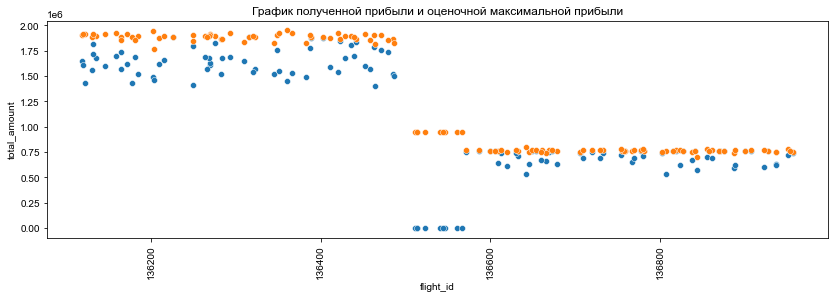

In [5]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.set_style('darkgrid',
          {'axes.facecolor': '0.8',
           'xtick.color': '.15',
           'figure.facecolor': '0.95'})
sns.scatterplot(x='flight_id', y='total_amount', data=flights,ax=ax)
sns.scatterplot(x='flight_id', y='max_possible_amount', data=flights,ax=ax)
plt.xticks(rotation=90)
ax.set_title('График полученной прибыли и оценочной максимальной прибыли')
plt.show()

Заметно разбитие графика на три части - это разбитие на 3 разных напрвления

Существуют рейсы с нулевой прибылью, и все в одном направлении. Запомним и обработаем это после следующего графика. 

Также заметим довольно большой разрыв полученной прибыли и оценочной максимальной прибыли - около 20%. Оценим описание заполненности самолета:

In [6]:
flights['fullness_plane'].describe()

count   127.00
mean     83.62
std      24.48
min       0.00
25%      82.31
50%      89.69
75%      98.20
max     100.00
Name: fullness_plane, dtype: float64

Можно заметить, что существуют рейсы без проданных билетов, а также 1-й квартиль на уровне 82.31%.

Построим графики заполненности самолета, приняв за ось X время вылета:

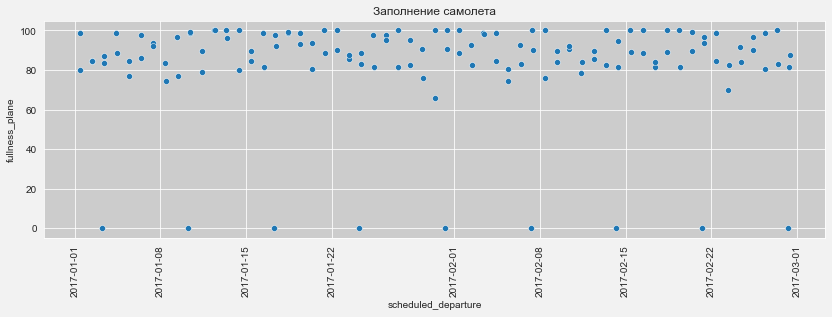

In [7]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.set_style('darkgrid',
          {'axes.facecolor': '0.8',
           'xtick.color': '.15',
           'figure.facecolor': '0.95'})
sns.scatterplot(x='scheduled_departure', y='fullness_plane', data=flights,ax=ax)
plt.xticks(rotation=90)
ax.set_title('Заполнение самолета')
plt.show()

Заметны выпады заполненности самолета меньше 80%. Возможно требуется замена самолета, но лучше обработать более серьезную проблему. 

Заполненность некоторых рейсов равна 0. Выведем рейсы, где заполненность меньше 20%

In [8]:
flights[flights.fullness_plane < 20]

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,status,aircraft_model,aircraft_range,occupied_seats,seats_on_plane,fullness_plane,total_amount,amount_per_ticket,max_possible_amount
118,136546,PG0194,2017-01-03 06:10:00+00:00,2017-01-03 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
119,136523,PG0194,2017-01-10 06:10:00+00:00,2017-01-10 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
120,136540,PG0194,2017-01-17 06:10:00+00:00,2017-01-17 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
121,136560,PG0194,2017-01-24 06:10:00+00:00,2017-01-24 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
122,136544,PG0194,2017-01-31 06:10:00+00:00,2017-01-31 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
123,136514,PG0194,2017-02-07 06:10:00+00:00,2017-02-07 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
124,136567,PG0194,2017-02-14 06:10:00+00:00,2017-02-14 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
125,136511,PG0194,2017-02-21 06:10:00+00:00,2017-02-21 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
126,136513,PG0194,2017-02-28 06:10:00+00:00,2017-02-28 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50


Все получившийся рейсы отправляются в Новокузнецк. Выведем все рейсы в Новокузнецк:

In [9]:
flights[flights.arrival_city == 'Novokuznetsk']

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,status,aircraft_model,aircraft_range,occupied_seats,seats_on_plane,fullness_plane,total_amount,amount_per_ticket,max_possible_amount
118,136546,PG0194,2017-01-03 06:10:00+00:00,2017-01-03 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
119,136523,PG0194,2017-01-10 06:10:00+00:00,2017-01-10 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
120,136540,PG0194,2017-01-17 06:10:00+00:00,2017-01-17 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
121,136560,PG0194,2017-01-24 06:10:00+00:00,2017-01-24 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
122,136544,PG0194,2017-01-31 06:10:00+00:00,2017-01-31 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
123,136514,PG0194,2017-02-07 06:10:00+00:00,2017-02-07 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
124,136567,PG0194,2017-02-14 06:10:00+00:00,2017-02-14 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
125,136511,PG0194,2017-02-21 06:10:00+00:00,2017-02-21 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50
126,136513,PG0194,2017-02-28 06:10:00+00:00,2017-02-28 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50


Всего 9 рейсов и все самолеты летят пустые. Запомним это и обработаем после расчета расходов и прибыльности рейса.

Выведем график выручки за билет, приняв за ось X время вылета:

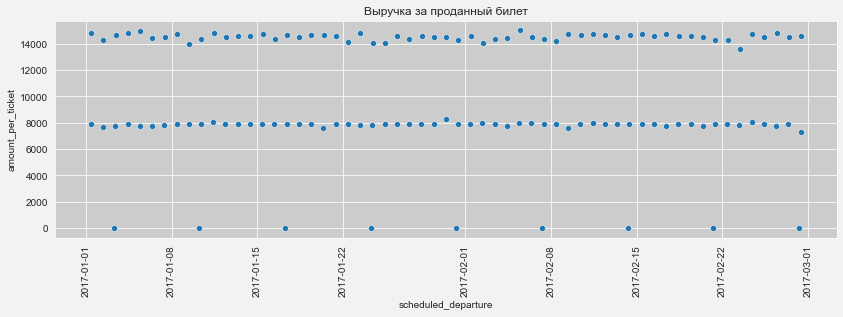

In [10]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.set_style('darkgrid',
          {'axes.facecolor': '0.8',
           'xtick.color': '.15',
           'figure.facecolor': '0.95'})
sns.scatterplot(x='scheduled_departure', y='amount_per_ticket', data=flights,ax=ax)
plt.xticks(rotation=90)
ax.set_title('Выручка за проданный билет')
plt.show()

Заметим среднюю цену билета в районе 8000. Поэтому предполагаем, что расчетная валюта - рубли.

### 4.Обработаем данные и добавим новые

Посчитаем количество рейсов, отправляющихся в каждый аэропорт:

In [11]:
flights['arrival_airport'].value_counts()

EGO    59
SVO    59
NOZ     9
Name: arrival_airport, dtype: int64

[Яндекс-Карта](https://yandex.ru/maps/org/mezhdunarodny_aeroport_anapa_im_v_k_kokkinaki/1115851692/?ll=37.348037%2C45.002652&z=14.69) - ссылка на аэропорт Анапы (AAQ)

Воспользуемся Яндекс-Картами и замерим расстяние до представленных аэропортов. Занесем измеренное растояние в базу данных через словарь:

In [12]:
range_dict = {'SVO':1220, 'EGO':630, 'NOZ':3645}
flights['flight_range'] = flights['arrival_airport'].replace(to_replace=range_dict)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,status,aircraft_model,aircraft_range,occupied_seats,seats_on_plane,fullness_plane,total_amount,amount_per_ticket,max_possible_amount,flight_range
0,136661,PG0480,2017-01-01 09:25:00+00:00,2017-01-01 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25,630
1,136936,PG0480,2017-01-02 09:25:00+00:00,2017-01-02 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,632400.00,7712.20,748082.93,630
2,136937,PG0480,2017-01-03 09:25:00+00:00,2017-01-03 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,81,97,83.51,626100.00,7729.63,749774.07,630
3,136819,PG0480,2017-01-04 09:25:00+00:00,2017-01-04 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25,630
4,136645,PG0480,2017-01-05 09:25:00+00:00,2017-01-05 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,633000.00,7719.51,748792.68,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136544,PG0194,2017-01-31 06:10:00+00:00,2017-01-31 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645
123,136514,PG0194,2017-02-07 06:10:00+00:00,2017-02-07 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645
124,136567,PG0194,2017-02-14 06:10:00+00:00,2017-02-14 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645
125,136511,PG0194,2017-02-21 06:10:00+00:00,2017-02-21 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645


Посчитаем количество самолетов в данных:

In [13]:
flights['aircraft_model'].value_counts()

Boeing 737-300         68
Sukhoi Superjet-100    59
Name: aircraft_model, dtype: int64

По данным расхода топлива [находим](https://nasamoletah.ru/samolety/skolko-topliva-rasxoduet-samolet.html), что расход топлива Boeing 737-300 - 3000 литров в час

По другим [данным](https://class-tour.com/rashod-topliva-raznyh-samoletov/) расход топлива Boeing 737-300 - 2,4 тыс. кг/ч. Также находим, что расход топлива Sukhoi Superjet 100 - 1,7 тыс. кг/ч

Опираясь на полученные данные можно посчитать, что плотность самолетного топлива 
    
    2400 килограмм / 3000 литров = 0.8 кг/л

Что звучит правдоподобно.

Переведем расход топлива Sukhoi Superjet 100 в литры:

    1700 килограмм / 0.8 кг/л = 2125 литров

Занесем полученный расход в базу данных через словарь:

In [14]:
expenses_plane = {'Boeing 737-300':3000, 'Sukhoi Superjet-100':2125}
flights['expenses_plane'] = flights['aircraft_model'].replace(to_replace=expenses_plane)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,status,aircraft_model,aircraft_range,occupied_seats,seats_on_plane,fullness_plane,total_amount,amount_per_ticket,max_possible_amount,flight_range,expenses_plane
0,136661,PG0480,2017-01-01 09:25:00+00:00,2017-01-01 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25,630,2125
1,136936,PG0480,2017-01-02 09:25:00+00:00,2017-01-02 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,632400.00,7712.20,748082.93,630,2125
2,136937,PG0480,2017-01-03 09:25:00+00:00,2017-01-03 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,81,97,83.51,626100.00,7729.63,749774.07,630,2125
3,136819,PG0480,2017-01-04 09:25:00+00:00,2017-01-04 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25,630,2125
4,136645,PG0480,2017-01-05 09:25:00+00:00,2017-01-05 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,633000.00,7719.51,748792.68,630,2125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136544,PG0194,2017-01-31 06:10:00+00:00,2017-01-31 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000
123,136514,PG0194,2017-02-07 06:10:00+00:00,2017-02-07 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000
124,136567,PG0194,2017-02-14 06:10:00+00:00,2017-02-14 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000
125,136511,PG0194,2017-02-21 06:10:00+00:00,2017-02-21 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000


[Находим](https://regionneftesbit.ru/cena-aviacionnogo-topliva-za-tonnu-2017/), что в 2017 году самолетное топливо "Дизельное топливо" Зимнее (-30°) стоило 39.50 руб. за 1 литр. Внесем эту переменную:

In [15]:
cost_per_litr = 39.50

Поскольку расход указан в литрах на один час полета - рассчитаем время полета в минутах и приведем в численное значение:

In [16]:
flights['minutes_fly'] = (flights['scheduled_arrival'] - flights['scheduled_departure'])
for i in range(len(flights['minutes_fly'])):
    flights['minutes_fly'][i] = flights['minutes_fly'][i].total_seconds() / 60.0

Внесем новую переменную - расходы на топливо:

In [17]:
flights['fuel_costs'] = flights['expenses_plane'] * flights['minutes_fly'] / 60.0 * cost_per_litr

Также можно внести новую переменную  - прибыль, равную разнице суммарной выручки и расходов на топливо:

In [18]:
flights['profit'] = flights['total_amount'] - flights['fuel_costs']

Выведем график прибыли, приняв за ось X время вылета:

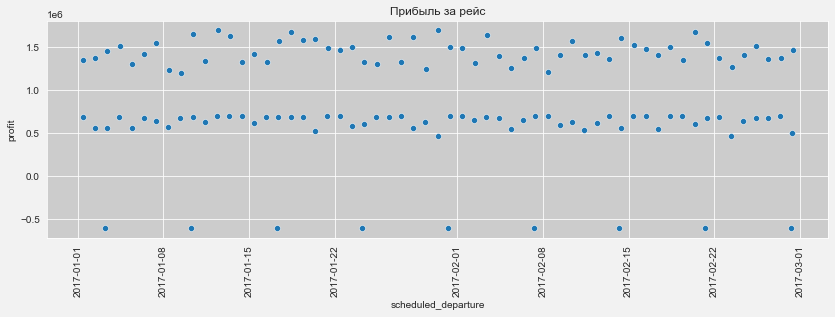

In [19]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.set_style('darkgrid',
          {'axes.facecolor': '0.8',
           'xtick.color': '.15',
           'figure.facecolor': '0.95'})
sns.scatterplot(x='scheduled_departure', y='profit', data=flights,ax=ax)
plt.xticks(rotation=90)
ax.set_title('Прибыль за рейс')
plt.show()

Средняя прибыль за рейс:

In [20]:
flights['profit'].mean()

926196.0465879265

### 5.Отмена и замена рейсов

Выведем все рейсы с прибылью меньше 0:

In [21]:
flights[flights.profit < 0]

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,status,aircraft_model,aircraft_range,occupied_seats,seats_on_plane,fullness_plane,total_amount,amount_per_ticket,max_possible_amount,flight_range,expenses_plane,minutes_fly,fuel_costs,profit
118,136546,PG0194,2017-01-03 06:10:00+00:00,2017-01-03 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
119,136523,PG0194,2017-01-10 06:10:00+00:00,2017-01-10 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
120,136540,PG0194,2017-01-17 06:10:00+00:00,2017-01-17 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
121,136560,PG0194,2017-01-24 06:10:00+00:00,2017-01-24 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
122,136544,PG0194,2017-01-31 06:10:00+00:00,2017-01-31 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
123,136514,PG0194,2017-02-07 06:10:00+00:00,2017-02-07 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
124,136567,PG0194,2017-02-14 06:10:00+00:00,2017-02-14 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
125,136511,PG0194,2017-02-21 06:10:00+00:00,2017-02-21 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
126,136513,PG0194,2017-02-28 06:10:00+00:00,2017-02-28 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00


Дальность полета у всех рейсов 3645 километров. Самолет Boeing 737-300 преодолевает расстояние 4200, поэтому проблем у него нет, а вот найти подходящую замену будет проблематично.

Поэтому отменяем большинство рейсов, оставляя рейсы:
- от 10 января - после новогодних каникул может кто-то воспользуется услугами в данном направлении; 
- от 21 февраля - возможно 3-4 дня выходных на 23 февраля;
- от 31 января - т.к. перерыв полтора месяца в регулярном еженедельном рейсе, может сказаться репутационнами потерями для авиакомпании

Остальные рейсы с flight_id:
- 136546,
- 136540, 
- 136560, 
- 136514, 
- 136567, 
- 136513 

отменяем, сохраняя копию оригинального датасета:

In [22]:
flights_original = flights.copy()
for i in [136546, 136540, 136560, 136514, 136567, 136513]:
    flights = flights[flights.flight_id != i]

Теперь средняя прибыль за рейс стала равна:

In [23]:
flights['profit'].mean()

1001992.9579889807

Оригинальные данные до отмены рейсов:

In [24]:
flights_original

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,status,aircraft_model,aircraft_range,occupied_seats,seats_on_plane,fullness_plane,total_amount,amount_per_ticket,max_possible_amount,flight_range,expenses_plane,minutes_fly,fuel_costs,profit
0,136661,PG0480,2017-01-01 09:25:00+00:00,2017-01-01 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25,630,2125,50.00,69947.92,689052.08
1,136936,PG0480,2017-01-02 09:25:00+00:00,2017-01-02 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,632400.00,7712.20,748082.93,630,2125,50.00,69947.92,562452.08
2,136937,PG0480,2017-01-03 09:25:00+00:00,2017-01-03 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,81,97,83.51,626100.00,7729.63,749774.07,630,2125,50.00,69947.92,556152.08
3,136819,PG0480,2017-01-04 09:25:00+00:00,2017-01-04 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25,630,2125,50.00,69947.92,689052.08
4,136645,PG0480,2017-01-05 09:25:00+00:00,2017-01-05 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,633000.00,7719.51,748792.68,630,2125,50.00,69947.92,563052.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136544,PG0194,2017-01-31 06:10:00+00:00,2017-01-31 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
123,136514,PG0194,2017-02-07 06:10:00+00:00,2017-02-07 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
124,136567,PG0194,2017-02-14 06:10:00+00:00,2017-02-14 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
125,136511,PG0194,2017-02-21 06:10:00+00:00,2017-02-21 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00


# Выводы

Проанализированы данные о доходности каждого рейса и затратах на них. Выведена средняя прибыльность рейса до отмены большинства убыточных рейсов и после.

По ходу решения описаны методы сбора, дополнения и аналитики данных, которые были использованы для оценки доходности рейса и расходов на них.

Из основных данных предлагается отменить основные убыточные рейсы с flight_id:
- 136546,
- 136540, 
- 136560, 
- 136514, 
- 136567, 
- 136513.

Другие убыточные рейсы с flight_id:
- 136523 
- 136544 
- 136511

Отмена этих рейсов требует дополнительных данных, ведь отмена может плохо повлиять на репутацию авиакомпании. 

Все изначальные рейсы сохранены в базе данных flights_original.

Получившийся данные:

In [25]:
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,departure_city,arrival_airport,arrival_city,status,aircraft_model,aircraft_range,occupied_seats,seats_on_plane,fullness_plane,total_amount,amount_per_ticket,max_possible_amount,flight_range,expenses_plane,minutes_fly,fuel_costs,profit
0,136661,PG0480,2017-01-01 09:25:00+00:00,2017-01-01 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25,630,2125,50.00,69947.92,689052.08
1,136936,PG0480,2017-01-02 09:25:00+00:00,2017-01-02 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,632400.00,7712.20,748082.93,630,2125,50.00,69947.92,562452.08
2,136937,PG0480,2017-01-03 09:25:00+00:00,2017-01-03 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,81,97,83.51,626100.00,7729.63,749774.07,630,2125,50.00,69947.92,556152.08
3,136819,PG0480,2017-01-04 09:25:00+00:00,2017-01-04 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,96,97,98.97,759000.00,7906.25,766906.25,630,2125,50.00,69947.92,689052.08
4,136645,PG0480,2017-01-05 09:25:00+00:00,2017-01-05 10:15:00+00:00,AAQ,Anapa,EGO,Belgorod,Arrived,Sukhoi Superjet-100,3000,82,97,84.54,633000.00,7719.51,748792.68,630,2125,50.00,69947.92,563052.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,136266,PG0252,2017-02-27 10:05:00+00:00,2017-02-27 11:45:00+00:00,AAQ,Anapa,SVO,Moscow,Arrived,Boeing 737-300,4200,108,130,83.08,1566400.00,14503.70,1885481.48,1220,3000,100.00,197500.00,1368900.00
117,136215,PG0252,2017-02-28 10:05:00+00:00,2017-02-28 11:45:00+00:00,AAQ,Anapa,SVO,Moscow,Arrived,Boeing 737-300,4200,114,130,87.69,1664000.00,14596.49,1897543.86,1220,3000,100.00,197500.00,1466500.00
119,136523,PG0194,2017-01-10 06:10:00+00:00,2017-01-10 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
122,136544,PG0194,2017-01-31 06:10:00+00:00,2017-01-31 11:15:00+00:00,AAQ,Anapa,NOZ,Novokuznetsk,Arrived,Boeing 737-300,4200,0,130,0.00,0.00,0.00,946367.50,3645,3000,305.00,602375.00,-602375.00
